In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
# boards = np.load("data/fs_chkpt99_100_boards.npy")
boards = np.load("data/fs_chkpt99_50_boards.npy")

In [164]:
def axial_to_rectangular(q: int, r: int, w, h, scale=1):
    screen_center_x, screen_center_y = w / 2, h / 2
    return screen_center_x + scale * np.sqrt(3) * (q + 0.5 * r), \
        screen_center_y + scale * 1.5 * r

In [165]:
boards.shape

(100, 9, 9)

In [166]:
players = {
    i: np.sum((boards == i).astype(float), axis=0) for i in range(6)
}

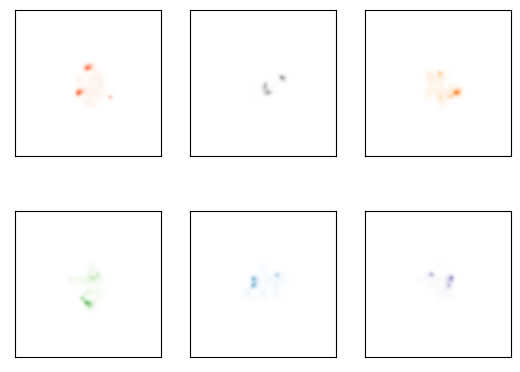

In [173]:
fig, ax = plt.subplots(2, 3)

n = boards.shape[1] // 4
scale = 4
h, w = boards.shape[1] * scale, boards.shape[2] * scale
board_rects = {
    i: np.zeros((h, w)) for i in range(6)
}
for i in range(6):
    for q in range(-2 * n, 2 * n + 1):
        for r in range(-2 * n, 2 * n + 1):
            x, y = axial_to_rectangular(q, r, w, h)
            if 0 <= round(x) < board_rect.shape[0] and 0 <= round(y) < board_rect.shape[1]:
                low_x, high_x = np.floor(x).astype(int), np.ceil(x).astype(int)
                low_y, high_y = np.floor(y).astype(int), np.ceil(y).astype(int)
                diff_low_x, diff_high_x = x - low_x, high_x - x
                diff_low_y, diff_high_y = y - low_y, high_y - y
    
                for a, diff_a in zip([low_x, high_x], [diff_low_x, diff_high_x]):
                    for b, diff_b in zip([low_y, high_y], [diff_low_y, diff_high_y]):
                        board_rects[i][b, a] += players[i][q, r] * diff_a * diff_b
                board_rects[i][round(y), round(x)] += players[i][q, r]
    board_rects[i] /= 100
cmaps = ["Reds", "Greys", "Oranges", "Greens", "Blues", "Purples"]
for i in range(6):
    ax[i // 3][i % 3].imshow(board_rects[i], interpolation="bicubic", cmap=cmaps[i], alpha=1.0 * (board_rects[i]>0))
    ax[i // 3][i % 3].set_xticks([])
    ax[i // 3][i % 3].set_yticks([])

In [174]:
frame = np.load("data/frame.npy")

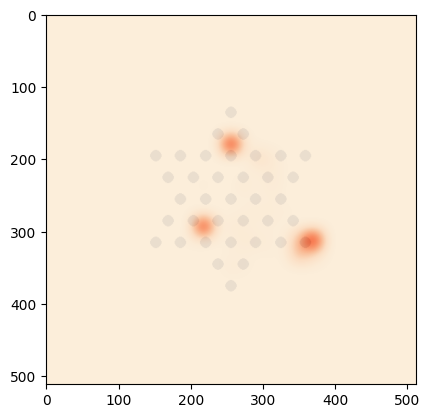

In [176]:
plt.figure()
plt.imshow(frame)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
extent=(xmin,xmax,ymin,ymax)
plt.imshow(masked, cmap=cmaps[0], interpolation="bicubic", alpha=0.8, extent=(xmin,xmax,ymin,ymax))
plt.show()